In [180]:
# -*- coding: utf-8 -*-
# -----------------------------------------------------------------------------
# Module name       : data load for the audio data
# Description       : Read Functions
# Author            : Jose Sebastian Nungo Manrique <jnungo@unal.edu.co>
# Creation date     : 2024
# -----------------------------------------------------------------------------

# Requires: librosa>=0.11.0, tqdm>=4.66.5, matplotlib>=3.5
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import glob
import os
import pandas as pd
from tqdm import tqdm
import seaborn as sns

# Load annotations for the audio data

This notebook imports the audio data and helps understand the audio annotations.

In [181]:
raw_path = r'../../data/AudioLabels/'
files_ann = os.listdir(raw_path) # Raw files
real_files = filter(lambda x: not (x.startswith('.') or x.startswith('desk')) , files_ann)
df = pd.DataFrame()

In [182]:
for path in real_files:
    df_path = pd.read_csv(raw_path + path, sep='\t', header=None)
    df_path['file'] = path
    df = pd.concat([df_path, df ])

df.rename({0: 'init', 1: 'end', 2:'label'}, axis=1, inplace=True) # Rename columns
df.reset_index(drop=True, inplace=True) # Reset index
df = df.loc[~df.label.str.contains('VOICE')] # Remove voice labels
df.insert(2, 'length', df.end - df.init) # Add length column
df.insert(3, 'rana_label', df.label.str.extract('(\w+)_\w')[0]) # Add rana_label column
df.insert(4, 'quality_label', df.label.str.extract('\w+_(\w)')[0]) # Add quality_label column
df['is_def'] = ~df['rana_label'].str.startswith('UN') # Add is_def column

In [183]:
df[df['rana_label']=='PHYNAT'].to_csv('FileNames.cvs')

In [184]:
# Remove species without sounds in category 'C'
df = df[~df['rana_label'].isin(['PHYNAT','ELAMAT','DENNAH'])]
df['rana_label'] = df['rana_label'].replace('UNF', 'UND')


In [185]:
''' Get some stats about the data '''

print('Number of unique recordings:: ', df.file.nunique())
print('Average annotations per recording:: ', df.groupby('file').size().mean())
print('Total annotations:: ', df.groupby('file').size().sum())
print('Average annotations per recording with defined category:: ', df.loc[df.rana_label != 'UND'].groupby('file').size().mean())
print('Total annotations with defined category:: ', df.loc[df.rana_label != 'UND'].groupby('file').size().sum())

Number of unique recordings::  267
Average annotations per recording::  15.48314606741573
Total annotations::  4134
Average annotations per recording with defined category::  12.195219123505977
Total annotations with defined category::  3061


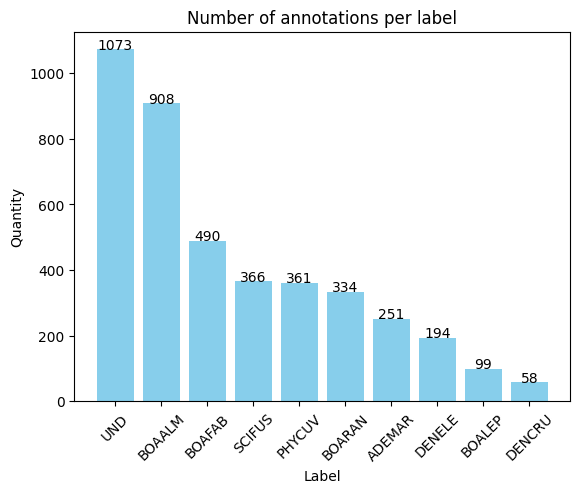

In [186]:
temp_1 = df.rana_label.value_counts()
# Sample data
categories = temp_1.index
values = temp_1.values
# Create bar plot
plt.bar(categories, values, color='skyblue')

# Add values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Quantity')
plt.title('Number of annotations per label')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [187]:
# quality in defined and undefined labels
pd.crosstab(df.is_def, df.quality_label, normalize='index')

quality_label,C,F,M
is_def,,,
False,0.005592,0.440820,0.553588
True,0.457694,0.107808,0.434499


In [188]:
pd.crosstab(df.rana_label, df.quality_label).loc[temp_1.index].T

,UND,BOAALM,BOAFAB,SCIFUS,PHYCUV,BOARAN,ADEMAR,DENELE,BOALEP,DENCRU
quality_label,,,,,,,,,,
C,6,290,171,189,251,83,212,90,58,57
F,473,33,62,65,49,59,22,40,0,0
M,594,585,257,112,61,192,17,64,41,1


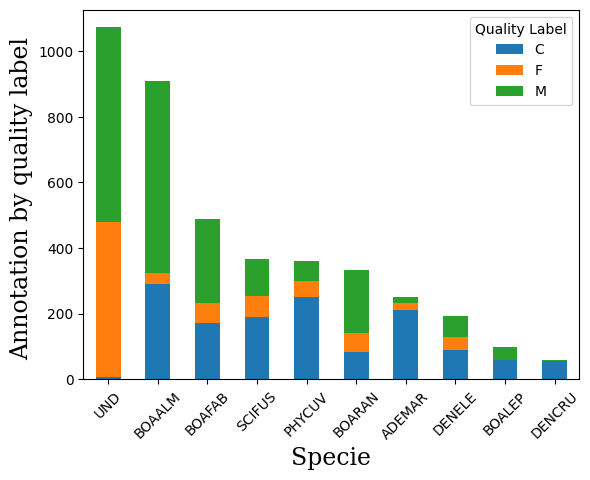

In [189]:
pd.crosstab(df.rana_label, df.quality_label).loc[temp_1.index].plot(kind='bar', stacked=True)
# Add labels and title
plt.xlabel('Specie', fontsize=17, fontfamily='serif')
plt.ylabel('Annotation by quality label ', fontsize=17, fontfamily='serif')
# plt.title('Minutes per specie', fontsize=17, fontfamily='serif')
plt.xticks(rotation=45)

plt.legend(title='Quality Label')
# Show plot
plt.show()

# Stats about the annotated data

In [190]:
# Stats about the annotated data
print('Total recording minutes:: ', df['length'].sum() / 60)
print('Average annotation seconds:: ', df['length'].mean())
print('Minutes of recordings with defined label:: ', df.loc[df.rana_label != 'UND', 'length'].sum() / 60)
print('Average scoring seconds with defined label:: ',df.loc[df.rana_label != 'UND', 'length'].mean())
print('Average annotation seconds with defined label:: ', df.loc[df.rana_label != 'UND', 'length'].mean())

Total recording minutes::  444.07108034999993
Average annotation seconds::  6.445153560957911
Minutes of recordings with defined label::  274.68150373333333
Average scoring seconds with defined label::  5.3841523110094816
Average annotation seconds with defined label::  5.3841523110094816


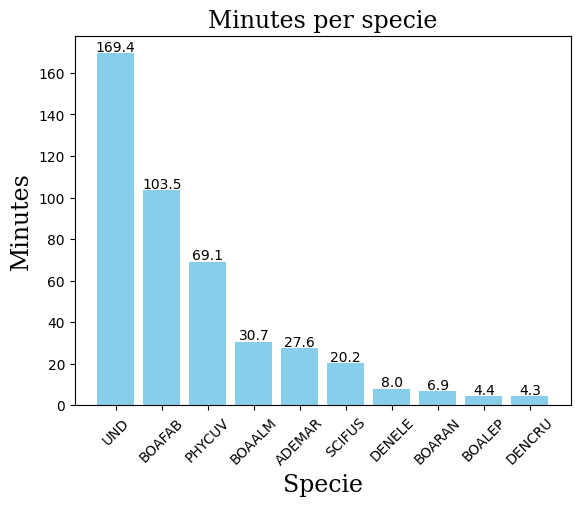

In [191]:
# Minutes per label
temp_2 = (df.groupby('rana_label')['length'].sum() / 60).sort_values(ascending=False)
# Sample data
categories = temp_2.index
values = temp_2.values.round(1)
# Create bar plot
plt.bar(categories, values, color='skyblue')

# Add values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center')

# Add labels and title
plt.xlabel('Specie', fontsize=17, fontfamily='serif')
plt.ylabel('Minutes', fontsize=17, fontfamily='serif')
plt.title('Minutes per specie', fontsize=17, fontfamily='serif')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [192]:
(pd.pivot_table(df, 'length', 'rana_label', 'quality_label', aggfunc='sum') / 60).loc[temp_2.index].T

rana_label,UND,BOAFAB,PHYCUV,BOAALM,ADEMAR,SCIFUS,DENELE,BOARAN,BOALEP,DENCRU
quality_label,,,,,,,,,,
C,0.024163,24.818131,27.568683,2.290977,16.294820,2.939306,0.856396,2.235113,2.680197,4.236305
F,68.104565,25.727806,24.496784,11.302054,8.363217,13.072365,4.120330,1.703830,NaN,NaN
M,101.260849,52.930381,17.045730,17.105311,2.922933,4.228770,3.067460,2.947963,1.696476,0.030166


In [193]:
pd.pivot_table(df, 'length', 'is_def', 'quality_label', aggfunc='sum') / 60

quality_label,C,F,M
is_def,,,
False,0.024163,68.104565,101.260849
True,83.919928,88.786386,101.975190


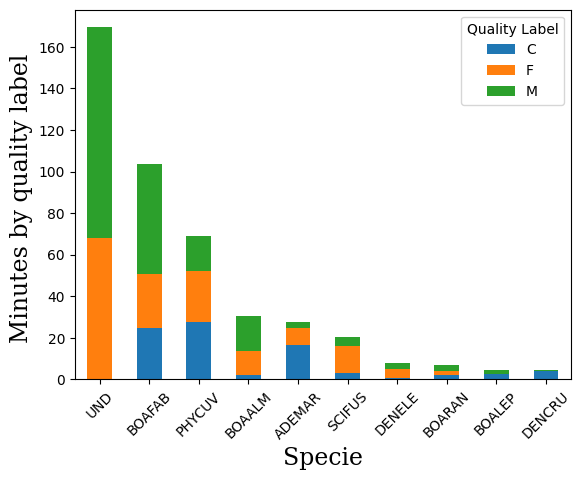

In [194]:
(pd.pivot_table(df, 'length', 'rana_label', 'quality_label', aggfunc='sum') / 60).loc[temp_2.index].plot(kind='bar', stacked=True)

plt.xlabel('Specie', fontsize=17, fontfamily='serif')
plt.ylabel('Minutes by quality label ', fontsize=17, fontfamily='serif')
# plt.title('Minutes per specie', fontsize=17, fontfamily='serif')
plt.xticks(rotation=45)

plt.legend(title='Quality Label')
# Show plot
plt.show()

# Save data catalog

In [ ]:
## Wav files
files_wav = os.listdir('../../../Grabaciones curadas/Grabaciones curadas')
files_wav = pd.Series(files_wav)

In [ ]:
def character_score(t_1, t_2):
    '''
    Function to calculate the score of two strings
    
    Parameters:
    t_1: str
    t_2: str

    Returns:
    score: int
    '''
    max_len = min(len(t_1), len(t_2))
    score = 0
    for i in range(max_len):
        if t_1[i] == t_2[i]:
            score += 1
        else:
            break

    return score

In [ ]:
def get_wav_path(name_file):
    '''
    Function to get the path of the wav file that matches the most with the name_file

    Parameters:
    name_file: str

    Returns:
    str
    '''
    idx = files_wav.apply(lambda x: character_score(name_file, x)).idxmax()
    return files_wav.iloc[idx]

In [ ]:
def compose(txt_file):
    '''
    Function to get the path of the wav file that matches the most with the name_file

    Parameters:
    txt_file: str

    Returns:
    str
    '''
    name_file, _ = os.path.splitext(txt_file)
    wav_path = get_wav_path(name_file)
    wav_path = '' if wav_path[-4:] == '.txt' else wav_path
    return wav_path

In [ ]:
## Add wav files to the data and save the catalog
df['file_wav'] = df.file.apply(compose)
df = df.query("file_wav != ''")
df.to_csv('../../../Grabaciones curadas/data_catalog.csv', index=False)